# Transcation Fraud Detection

Author: Xinyu Chen

Email: chenxinyupeter@126.com

Github: https://github.com/cxy-peter/Math-10-project


Course Project, UC Irvine, Math 10, F23

## Introduction


**This project predicts the fraud detection using features. However, there also exists no-use features, so I have to find which dedicates most to the prediction. Also, it has results of 0 and 1, which presents to be a supervised learning and binary classification problem.**

# 1. import data

## **This original dataset costs long time to process, you may switch directly to the second dataset to run the cell, it will take shorter time, this section is for simplify the dataset. You can see the instruction underneath to straightforwardly run the second csv file.**

In [ ]:
#It will take up to 20-25 sec to execute the csv.
import pandas as pd
df=pd.read_csv("/work/PS_20174392719_1491204439457_log.csv").copy()
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
import warnings
warnings.filterwarnings('ignore',category = DeprecationWarning)

In [ ]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


**There is no duplicated rows.**

# 2.EDA

**What does each variable means?**
**step**     
Transcation happens in a hour, no use                 
**type**      
transaction type, sentence the affliation of the fraud                  
**amount**
amount of the transcation                   
**nameOrig**
the account payer                  
**oldbalanceOrg**
the payer's amount before the transcation             
**newbalanceOrig** 
the payer's amount after the transcation           
**nameDest**
the payee's name                
**oldbalanceDest**
the payee's amount before the transcation     
**newbalanceDest**
the payee's amount after the transcation    
**isFraud**
Whether the transcation is a fraud(0,1), so it's a supervised learning question                  
**isFlaggedFraud**
Whether a transfer amount>200000, no big use now    

**We need to classify the fraud type because maybe not every type has the fraud record**

In [ ]:
grouped_counts = df[df['isFraud']==1].groupby('type').size()
grouped_counts

type
CASH_OUT    4116
TRANSFER    4097
dtype: int64

**We can see that only 'cash_out' and 'transfer' type has the fraud record, so we can focus on these two. Also, considering the record and the fraud amount, there aren't many fraud happens. Therefore, the x should only be data that contains 'transfer' and 'cash_out'.**

**Therefore, we will only focus on data containing this two types. Also, since step only contains number 1, so we can drop it.**

In [ ]:
tmp = df.loc[(df['type'].isin(['TRANSFER', 'CASH_OUT'])),:]
for column in ['step']:
    if column in tmp.columns:
        tmp.drop(['step'], axis=1,inplace=True)
tmp.to_csv('first_processing_data.csv')

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
tmp.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
tmp.shape

(2770409, 10)

## **If the dataset provides too much time to process, it's also fine to start the notebook from here.**

In [ ]:
import pandas as pd
df=pd.read_csv('first_processing_data.csv').copy()
if df.columns[0] != 'type':
    df.drop(df.columns[0], axis=1, inplace=True)
print(df.shape)
#This will greatly decreases the processing time.
df.columns

(2770409, 10)


Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df.sample(5)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2056112,CASH_OUT,84059.52,C1583877681,0.0,0.0,C1503134106,220619.67,304679.18,0,0
983956,CASH_OUT,40584.70,C1384648531,17215.0,0.0,C940141589,0.00,40584.70,0,0
2359232,CASH_OUT,310984.43,C893666197,0.0,0.0,C1618024942,481055.93,792040.36,0,0
923004,CASH_OUT,26021.74,C192862021,0.0,0.0,C2043549610,1618256.14,1644277.88,0,0
1286308,TRANSFER,1079362.35,C709778027,0.0,0.0,C446002180,2584452.81,4085189.07,0,0


**Firstly, we need to decide whether to drop the isFlaggedFraud, an easy way to determine is that it contains only the transfer type, as the variable definition says, is not enough to decide whether an transcation is fraud, because there remains cash_out type, but we can look closer to it.**

In [ ]:
df[df.isFlaggedFraud == 1]

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1204984,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
1422214,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
1646619,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
2428454,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
2619154,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
2619156,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
2688696,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
2703826,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
2729568,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
2736011,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


**We can also validate the variable by using the random forest to decide the importance of each variable.**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

df_test1=df.copy()
X = df_test1.drop(['isFraud','type','nameOrig','nameDest'], axis=1)  # 特征列
y = df_test1['isFraud']  # 目标列

num_samples = 20

feature_importance_scores = []

for i in range(num_samples):
    sample_indices = np.random.choice(len(X), size=5000, replace=False)
    X_sample = X.iloc[sample_indices]
    y_sample = y.iloc[sample_indices]
    
    rfc = RandomForestClassifier(n_estimators=100, random_state=42)
    rfc.fit(X_sample, y_sample)
    
    feature_importance_scores.append(rfc.feature_importances_)

average_feature_importance = np.mean(feature_importance_scores, axis=0)

feature_importance_dict = dict(zip(X.columns, average_feature_importance))

for feature, importance in feature_importance_dict.items():
    print(f"Feature: {feature}, Importance: {importance:.4f}")


Feature: amount, Importance: 0.1838
Feature: oldbalanceOrg, Importance: 0.3878
Feature: newbalanceOrig, Importance: 0.0454
Feature: oldbalanceDest, Importance: 0.1527
Feature: newbalanceDest, Importance: 0.2294
Feature: isFlaggedFraud, Importance: 0.0008


**We can see that ithas very low importance, so we'd better drop it.**

**There is only 16 transcations this varible can know. If "isFlaggedFraud"=1, it's definitly "isFraud"=1, but there remains fraud but the "isFlaggedFraud" doesn't recognize. Therefore, the transcation doesn't seem to have a good reflection of the label itself, so we'd better drop it.**

In [ ]:
df[(df.type=='TRANSFER') & ((df.amount >=2000000) | (abs(df.oldbalanceOrg-df.newbalanceOrig)>2000000) | (abs(df.newbalanceDest-df.oldbalanceDest)>2000000))]

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4,TRANSFER,311685.89,C1984094095,10835.00,0.00,C932583850,6267.00,2719172.89,0,0
19,TRANSFER,125872.53,C1443967876,0.00,0.00,C392292416,348512.00,3420103.09,0,0
20,TRANSFER,379856.23,C1449772539,0.00,0.00,C1590550415,900180.00,19169204.93,0,0
21,TRANSFER,1505626.01,C926859124,0.00,0.00,C665576141,29031.00,5515763.34,0,0
24,TRANSFER,761507.39,C412788346,0.00,0.00,C1590550415,1280036.23,19169204.93,0,0
...,...,...,...,...,...,...,...,...,...,...
2770369,TRANSFER,10000000.00,C88849251,25674547.89,15674547.89,C1939028448,0.00,0.00,1,0
2770371,TRANSFER,10000000.00,C1945606464,15674547.89,5674547.89,C625944676,0.00,0.00,1,0
2770373,TRANSFER,5674547.89,C992223106,5674547.89,5674547.89,C1366804249,0.00,0.00,1,1
2770387,TRANSFER,4009058.39,C1044665079,4009058.39,0.00,C750074708,0.00,0.00,1,0


**The final decision whether to drop this variable is that it can't filter all the transfer one that are >2000000, so I really don't know what's this varible for, so I will drop it. Also, I've figured out we can't see through whether a transcation is fraud by calculating the spread of the old balanceOrg and new balanceorig or by the payee side or the amount side to decide in this question, to certify my conclusion, I will write the code.**

In [ ]:
df[(df.isFraud==0)&(df.type=='TRANSFER')&((df.amount!=(df.oldbalanceOrg-df.newbalanceOrig))|(df.amount!=abs(df.oldbalanceDest-df.newbalanceDest))|(abs(df.oldbalanceDest-df.newbalanceDest)!=abs(df.newbalanceDest-df.oldbalanceDest))|(df.oldbalanceDest-df.newbalanceDest+df.newbalanceDest-df.oldbalanceDest!=0))]

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,TRANSFER,215310.30,C1670993182,705.00,0.00,C1100439041,22425.00,0.00,0,0
4,TRANSFER,311685.89,C1984094095,10835.00,0.00,C932583850,6267.00,2719172.89,0,0
9,TRANSFER,62610.80,C1976401987,79114.00,16503.20,C1937962514,517.00,8383.29,0,0
14,TRANSFER,42712.39,C283039401,10363.39,0.00,C1330106945,57901.66,24044.18,0,0
15,TRANSFER,77957.68,C207471778,0.00,0.00,C1761291320,94900.00,22233.65,0,0
...,...,...,...,...,...,...,...,...,...,...
2770096,TRANSFER,92746.73,C587921214,5051.00,0.00,C930436926,279931.86,372678.59,0,0
2770097,TRANSFER,76507.70,C1157171835,13161.00,0.00,C720176528,274281.30,350789.00,0,0
2770098,TRANSFER,14563.03,C936960472,20705.00,6141.97,C1924752944,153878.31,168441.35,0,0
2770102,TRANSFER,139144.25,C1264043726,7075.00,0.00,C2093369248,49040158.93,49179303.19,0,0


**We can't simply treat it as a accounting problem, there usually exists other questions. Also, the condition of condition, old and new balanceorg can be treated as one feature by using +/-.**

**So what about the name of payer and payee? It's rather a good point as we may need to think about before dropping it not to treat it as a feature. We can classify the data using C and M.**

In [ ]:
import numpy as np
df['type2'] = np.nan
df.loc[df.nameOrig.str.contains('C') & df.nameDest.str.contains('C'), 'type2'] = 'CC'
df.loc[df.nameOrig.str.contains('C') & df.nameDest.str.contains('M'), 'type2'] = 'CM'
df.loc[df.nameOrig.str.contains('M') & df.nameDest.str.contains('C'), 'type2'] = 'MC'
df.loc[df.nameOrig.str.contains('M') & df.nameDest.str.contains('C'), 'type2'] = 'MM'


In [ ]:
df['type2'].value_counts()

CC    2770409
Name: type2, dtype: int64

**Tricky part is that all fraud are CC in transfer and check out fraction, so it's better throw them.**

In [ ]:
columns_to_drop = ['type2', 'nameOrig', 'nameDest', 'isFlaggedFraud']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

# 3.data cleaning and feature engineering

**Firstly, we need to change some column names to achieve the standardize effect.**

In [ ]:
df.rename(columns={'oldbalanceOrg': 'from_oldb', 'newbalanceOrig': 'from_newb','oldbalanceDest': 'to_oldb','newbalanceDest': 'to_newb'}, inplace=True)

**Also, since I've only contained cash_out and transfer type as the only two columns that isFraud=1, the df columns can be set as the dataset. isFraud column should be set as Y for upcoming machine learning dataset setting.**

**Set the type of transcation into digital numbers for better classification.**

In [ ]:
df.loc[df.type=='TRANSFER','type'] = 0
df.loc[df.type=='CASH_OUT','type'] = 1

**Next, we need to deal with the missing values. I've discussed before on whether to retain the 'isFlaggedFraud' variable when I find that from and to account has amount balance but 'amount' column remains 0 but not be considered as a fraud, and that may be a missing value problem. Here are two situations: one is that amount>0, but from_oldb=0 and from_newb=0, another situation is that amount>0, but to_oldb and to_newb=0.Thereforem we should examine the fraud amount to decide what we should do about it.**

In [ ]:
len(df.loc[(df.isFraud==1) & (df.from_oldb==0)& (df.from_newb==0)& (df.amount!=0)])/len(df[df['isFraud']==1])

0.0030439547059539756

In [ ]:
len(df.loc[(df.isFraud==0) & (df.from_oldb==0)& (df.from_newb==0)& (df.amount!=0)])/len(df[df['isFraud']==0])

0.4737321319703598

**It does have smaller probability that both are 0 is considered to be a fraud, therefore, we should set it still because it won't influence much about the result of the fraud rate, we can treat it as nan to decrease the probability of wrongly treatment.** 

In [ ]:
len(df.loc[(df.isFraud==1) & (df.to_oldb==0)& (df.to_newb==0)& (df.amount!=0)])/len(df[df['isFraud']==1])

0.4955558261293072

In [ ]:
len(df.loc[(df.isFraud==0) & (df.to_oldb==0)& (df.to_newb==0)& (df.amount!=0)])/len(df[df['isFraud']==0])

0.0006176245277308345

**The non fraud rate of the second situation has a low rate, we can tell that if to_b=0, it is more likely to be a fraud transcation, so we'd better change the number from 0 to -1 for the better usuage of the upcoming machine learning method.**

In [ ]:
df.loc[(df.to_oldb==0)& (df.to_newb==0)& (df.amount!=0),['to_oldb','to_newb']]=-1
df.loc[(df.from_oldb==0)& (df.from_newb==0)& (df.amount!=0),['from_oldb','from_newb']]=np.nan

**To simplify the dataset, we won't discuss any rows containing nan because it may increase unecessary burden to the model fitting in the next part.**

In [ ]:
df=df.dropna()

**From the above missing value disscussion we cen tell that to_b and from_b has close relationship with amount, so we should set these three into a new variable since they prove to be similar function, let alone they point out to decrease missing value influence after combining together.**

In [ ]:
df['errorto_b']=df.to_newb+df.amount-df.to_oldb
df['errorfrom_b']=df.from_newb+df.amount-df.from_oldb

In [ ]:
df.columns

Index(['type', 'amount', 'from_oldb', 'from_newb', 'to_oldb', 'to_newb',
       'isFraud', 'errorto_b', 'errorfrom_b'],
      dtype='object')

**Before modeling, let's evaluate again the feature importance.**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

df_test=df.copy()
X = df_test.drop('isFraud', axis=1)  
y = df_test['isFraud']  

num_samples = 20

feature_importance_scores = []

for i in range(num_samples):
    sample_indices = np.random.choice(len(X), size=5000, replace=False)
    X_sample = X.iloc[sample_indices]
    y_sample = y.iloc[sample_indices]
    
    rfc = RandomForestClassifier(n_estimators=100, random_state=42)
    rfc.fit(X_sample, y_sample)
    
    feature_importance_scores.append(rfc.feature_importances_)

average_feature_importance = np.mean(feature_importance_scores, axis=0)

feature_importance_dict = dict(zip(X.columns, average_feature_importance))

for feature, importance in feature_importance_dict.items():
    print(f"Feature: {feature}, Importance: {importance:.4f}")


Feature: type, Importance: 0.0518
Feature: amount, Importance: 0.0886
Feature: from_oldb, Importance: 0.1726
Feature: from_newb, Importance: 0.1666
Feature: to_oldb, Importance: 0.1731
Feature: to_newb, Importance: 0.2022
Feature: errorto_b, Importance: 0.0673
Feature: errorfrom_b, Importance: 0.0777


**We can also use the pearson correlation to watch the relation of each two variables.**

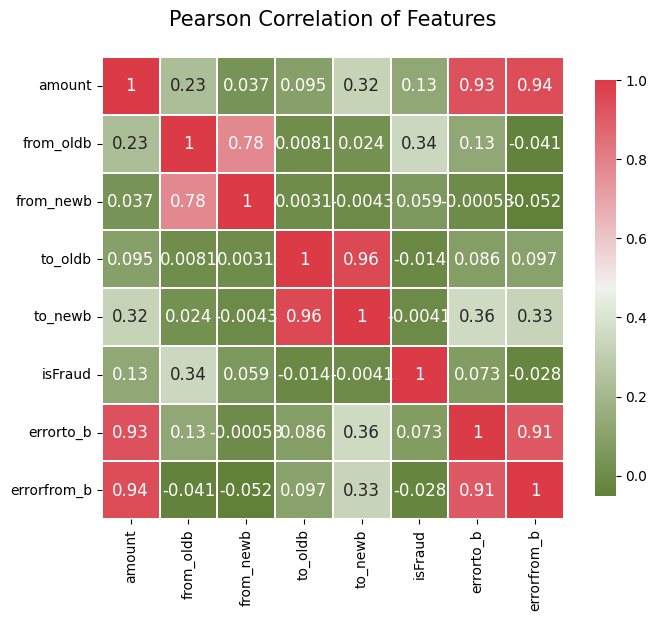

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(8, 6))
    colormap = sns.diverging_palette(110, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)

# 4.model building

In [ ]:
X=df.drop(['isFraud'],axis=1).copy()

In [ ]:
Y = df['isFraud']

## Xgboost

**Xgboost is a machine learning tool to predict outcomes. Why I want to put it at the first place is that it can handle the missing values easily, and quicker than the random forest, and is often used in competition.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import xgboost as xgb

**For the best use of machine learning, I choose a range of learning rate to get the best prediction.**

In [ ]:
#X = pd.get_dummies(X)
X_train_xgb,X_test_xgb,y_train_xgb,y_test_xgb=train_test_split(df[['amount', 'from_oldb', 'from_newb', 'to_oldb', 'to_newb', 'errorto_b', 'errorfrom_b']],Y,test_size = 0.2,random_state=42)
answer=pd.DataFrame(columns=['i', 'train_errors', 'test_errors'])
for i in np.arange(0.05, 0.15, 0.01):
    xgbr = xgb.XGBClassifier(max_depth = 3, n_jobs = -1, random_state = 42, learning_rate = i)
    xgbr.fit(X_train_xgb, y_train_xgb)
    train_error_xgb = 1 - xgbr.score(X_train_xgb, y_train_xgb)
    test_error_xgb = 1 - xgbr.score(X_test_xgb, y_test_xgb)
    answer = answer.append({
        'i': i,
        'train_errors': train_error_xgb,
        'test_errors': test_error_xgb
    },ignore_index=True)

answer.head(5)


,i,train_errors,test_errors
0,0.05,0.000582,0.000534
1,0.06,0.000582,0.000534
2,0.07,0.000579,0.000530
3,0.08,0.000572,0.000537
4,0.09,0.000556,0.000527


In [ ]:
answer

,i,train_errors,test_errors
0,0.05,0.000582,0.000534
1,0.06,0.000582,0.000534
2,0.07,0.000579,0.000530
3,0.08,0.000572,0.000537
4,0.09,0.000556,0.000527
5,0.10,0.000553,0.000516
6,0.11,0.000546,0.000520
7,0.12,0.000535,0.000510
8,0.13,0.000540,0.000510
9,0.14,0.000520,0.000510


In [ ]:
import altair as alt

c1 = alt.Chart(answer).mark_line(color='black').encode(
    x='i',
    y=alt.Y('train_errors', scale=alt.Scale(domain=[0.0005, max(answer['train_errors'])]))
)


c2 = alt.Chart(answer).mark_line(color='red').encode(
    x='i',
    y=alt.Y('test_errors', scale=alt.Scale(domain=[0.0005, max(answer['test_errors'])])),
    tooltip='i'
).properties(
    title='Train Error and Test Error Depending on Learning Rate'
)


final_chart = c1 + c2
final_chart



alt.LayerChart(...)

**I will use i=0.1 as the learning rate since it's the lowest rate except the end.**

In [ ]:
xgbr = xgb.XGBClassifier(max_depth = 3, n_jobs = -1, random_state = 42, learning_rate = 0.1)
xgbr.fit(X_train_xgb, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
df_xgbr=pd.DataFrame(columns=["isFraud","pred"])
df_xgbr["isFraud"]=y_test_xgb
df_xgbr["pred"]=xgbr.predict(X_test_xgb)

In [ ]:
df_xgbr = pd.DataFrame({
    "isFraud": df_xgbr["isFraud"],
    "pred": df_xgbr["pred"]
})
y_pred_xgbr = xgbr.predict(X_test_xgb)
y_pred_proba_xgbr = xgbr.predict_proba(X_test_xgb)[:, 1]
error_xgbr=(df_xgbr["isFraud"]==df_xgbr["pred"]).sum()/df_xgbr.shape[0]
error_xgbr

0.9994835293755494

**Use confusion matrix to see the prediction failure.**

In [ ]:
import pandas as pd
import altair as alt
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test_xgb, y_pred_xgbr)


df_cm = pd.DataFrame(cm, index=["0", "1"], columns=["0", "1"])

df_cm_long = df_cm.reset_index().melt(id_vars='index')

chart = alt.Chart(df_cm_long).mark_text(size=20).encode(
    x='variable:N',
    y='index:N',
    color='value:Q',
    text='value:Q'
).properties(
    width=300,
    height=300,
    title='Confusion Matrix'
)

chart.display()

alt.Chart(...)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

**Logistic Regression has no need to test the parameters, just use it to classify, so it may be has the worst prediction, we can later use methods to find out.**

In [ ]:
X_train_log,X_test_log,y_train_log,y_test_log=train_test_split(df[['amount', 'from_oldb', 'from_newb', 'to_oldb', 'to_newb', 'errorto_b', 'errorfrom_b']],Y,test_size = 0.2,random_state=42)
log = LogisticRegression(random_state = 42)
log.fit(X_train_log, y_train_log)
df_log=pd.DataFrame(columns=["isFraud","pred"])
df_log["isFraud"]=y_test_log
df_log["pred"]=log.predict(X_test_log)
df_log = pd.DataFrame({
    "isFraud": df_log["isFraud"],
    "pred": df_log["pred"]
})
y_pred_log = log.predict(X_test_log)
y_pred_proba_log = log.predict_proba(X_test_log)[:, 1]
error_log=(df_log["isFraud"]==df_log["pred"]).sum()/df_log.shape[0]
error_log

0.995488577790395

In [ ]:
import pandas as pd
import altair as alt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_log, y_pred_log) 


df_cm = pd.DataFrame(cm, index=["0", "1"], columns=["0", "1"])

df_cm_long = df_cm.reset_index().melt(id_vars='index')

chart = alt.Chart(df_cm_long).mark_text(size=20).encode(
    x='variable:N',
    y='index:N',
    color='value:Q',
    text='value:Q'
).properties(
    width=300,
    height=300,
    title='Confusion Matrix'
)

chart.display()


alt.Chart(...)

## random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

**Random forest takes much more time to estimate, we firstly set to find the best n_estimators, it may take about 5-10 min to complete.**

In [ ]:
X_train_rfc,X_test_rfc,y_train_rfc,y_test_rfc=train_test_split(df[['amount', 'from_oldb', 'from_newb', 'to_oldb', 'to_newb', 'errorto_b', 'errorfrom_b']],Y,test_size = 0.2,random_state=42)
answer_rf=pd.DataFrame(columns=['i', 'train_errors', 'test_errors'])
for i in np.arange(10, 20, 1):
    rfc = RandomForestClassifier(n_estimators = i, n_jobs = -1)
    rfc.fit(X_train_rfc, y_train_rfc)
    train_error = 1 - rfc.score(X_train_rfc, y_train_rfc)
    test_error = 1 - rfc.score(X_test_rfc, y_test_rfc)
    answer_rf = answer_rf.append({
        'i': i,
        'train_errors': train_error,
        'test_errors': test_error
    },ignore_index=True)

answer_rf.head(5)

,i,train_errors,test_errors
0,10.0,8.550853e-07,0.000010
1,11.0,0.000000e+00,0.000017
2,12.0,0.000000e+00,0.000010
3,13.0,8.550853e-07,0.000014
4,14.0,8.550853e-07,0.000014


In [ ]:
answer_rf

,i,train_errors,test_errors
0,10.0,8.550853e-07,0.000017
1,11.0,8.550853e-07,0.000010
2,12.0,0.000000e+00,0.000010
3,13.0,0.000000e+00,0.000010
4,14.0,8.550853e-07,0.000014
5,15.0,0.000000e+00,0.000014
6,16.0,0.000000e+00,0.000014
7,17.0,8.550853e-07,0.000010
8,18.0,8.550853e-07,0.000014
9,19.0,0.000000e+00,0.000017


In [ ]:
import altair as alt

c3 = alt.Chart(answer_rf).mark_line(color='black').encode(
    x='i',
    y='train_errors'
)


c4 = alt.Chart(answer_rf).mark_line(color='red').encode(
    x='i',
    y='test_errors',
    tooltip='i'
).properties(
    title='Train Error and Test Error Depending on n_estimators'
)


final_chart = c3 + c4
final_chart


alt.LayerChart(...)

**I will choose n_estimators=15.**

In [ ]:
rfc = RandomForestClassifier(n_estimators = 15, n_jobs = -1)
rfc.fit(X_train_rfc, y_train_rfc)
df_rfc=pd.DataFrame(columns=["isFraud","pred"])
df_rfc["isFraud"]=y_test_rfc
df_rfc["pred"]=rfc.predict(X_test_rfc)
df_rfc = pd.DataFrame({
    "isFraud": df_rfc["isFraud"],
    "pred": df_rfc["pred"]
})
y_pred_rfc = rfc.predict(X_test_rfc)
y_pred_proba_rfc = rfc.predict_proba(X_test_rfc)[:, 1]
error_rfc=(df_rfc["isFraud"]==df_rfc["pred"]).sum()/df_rfc.shape[0]
error_rfc

0.9999897389942162

In [ ]:
import pandas as pd
import altair as alt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_rfc, y_pred_rfc)  


df_cm = pd.DataFrame(cm, index=["0", "1"], columns=["0", "1"])

df_cm_long = df_cm.reset_index().melt(id_vars='index')

chart = alt.Chart(df_cm_long).mark_text(size=20).encode(
    x='variable:N',
    y='index:N',
    color='value:Q',
    text='value:Q'
).properties(
    width=300,
    height=300,
    title='Confusion Matrix'
)

chart.display()



alt.Chart(...)

**We can roughly compare with each other about the prediction accuracy of three models, and other stuff will be disscussed in the next part.**

In [ ]:
import altair as alt
import pandas as pd


errors = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic', 'XGBoost'],
    'Error Difference': [1 - error_rfc, 1 - error_log, 1 - error_xgbr]  # Differences from 1
})

# Create a horizontal bar chart
bar_chart = alt.Chart(errors).mark_bar().encode(
    y='Model:N',
    x=alt.X('Error Difference:Q', axis=alt.Axis(format='.6f')),  
    color='Model:N'
).properties(
    title='Error Difference for Models'
)

# Create text labels for the bars
text = bar_chart.mark_text(
    align='left',
    baseline='middle',
    dx=3  
).encode(
    x=alt.X('Error Difference:Q', stack='zero'), 
    y=alt.Y('Model:N'),
    text=alt.Text('Error Difference:Q', format='.6f')  
)

chart_with_text = bar_chart + text

chart_with_text



alt.LayerChart(...)

# 5.model evaluation

**We will use accuracy_score, precision_score, recall_score,F1 score and AUC-ROC to decide whether it's a good model.**
**accuracy_score**: This measures the overall correctness of the model by calculating the ratio of correctly predicted instances (both true positives and true negatives) to the total number of instances. A higher accuracy is better, but this metric can be misleading if the class distribution is imbalanced.

**precision_score**: Precision assesses the model's ability to correctly identify only relevant instances. It is the ratio of true positives (correct positive predictions) to the sum of true and false positives (all positive predictions). A higher precision score is better and means fewer false positive errors.

**recall_score**: Recall (or sensitivity) measures the model's ability to detect all relevant instances. It is the ratio of true positives to the sum of true positives and false negatives (all actual positive instances). A higher recall score is better, indicating fewer false negative errors.

**f1_score**: The F1 score is a balanced measure that combines precision and recall. It is the harmonic mean of precision and recall, providing a single metric that accounts for both false positives and false negatives. A higher F1 score is better, indicating a balanced model in terms of precision and recall.

**roc_auc_score**: The ROC (Receiver Operating Characteristic) AUC (Area Under the Curve) score measures a model's ability to distinguish between the classes. It is the probability that the model ranks a randomly chosen positive instance higher than a randomly chosen negative one. A higher AUC score is better, indicating a better distinction between positive and negative instances.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## XGBoost

In [ ]:
accuracy = accuracy_score(y_test_xgb, y_pred_xgbr)
precision = precision_score(y_test_xgb, y_pred_xgbr)
recall = recall_score(y_test_xgb, y_pred_xgbr)
f1 = f1_score(y_test_xgb, y_pred_xgbr)
auc_roc = roc_auc_score(y_test_xgb, y_pred_proba_xgbr)

print("Accuracy:", accuracy)
print("precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC:", auc_roc)

Accuracy: 0.9994835293755494
precision: 0.9476600985221675
Recall: 0.9588785046728971
F1 Score: 0.9532362960668938
AUC-ROC: 0.998687124019304


## Logistic regression

In [ ]:
accuracy = accuracy_score(y_test_log, y_pred_log)
precision = precision_score(y_test_log, y_pred_log)
recall = recall_score(y_test_log, y_pred_log)
f1 = f1_score(y_test_log, y_pred_log)
auc_roc = roc_auc_score(y_test_log, y_pred_proba_log)

print("Accuracy:", accuracy)
print("precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC:", auc_roc)

Accuracy: 0.995488577790395
precision: 0.5688824662813102
Recall: 0.7358255451713396
F1 Score: 0.6416734582993753
AUC-ROC: 0.9495115510706759


## random forest

In [ ]:
accuracy = accuracy_score(y_test_rfc, y_pred_rfc)
precision = precision_score(y_test_rfc, y_pred_rfc)
recall = recall_score(y_test_rfc, y_pred_rfc)
f1 = f1_score(y_test_rfc, y_pred_rfc)
auc_roc = roc_auc_score(y_test_rfc, y_pred_proba_rfc)

print("Accuracy:", accuracy)
print("precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC:", auc_roc)

Accuracy: 0.9999897389942162
precision: 1.0
Recall: 0.9981308411214953
F1 Score: 0.9990645463049579
AUC-ROC: 0.9990651055671961


**Random forest shows the best prediction of fraud detection, and nearly all evaluation methods show the good predicition, the Xgboost is in the second place, and it shows a higher process time compared with the random forest, but presents more prediction failure, the logistic regression shows the worst result.**

## Summary

Either summarize what you did, or summarize the results.  Maybe 3 sentences.

**In this project, we select features to predict the fraud. Firstly, we use quantitative method to get the most-related variables and feasible dataset, and then use xgboost, logistic regression and random forest to predict the fraud and their effectiveness, and shows a good result on random forest. This project can give instructions for fraud detection.**

## References

Your code above should include references.  Here is some additional space for references.

* What is the source of your dataset(s)?

https://www.kaggle.com/datasets/ealaxi/paysim1

* List any other references that you found helpful.

XGBoost: https://xgboost.readthedocs.io/en/stable/
accuracy:https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score
recall:https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score
F1:https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
AUC-ROC:https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
confusion matrix:https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix